In [44]:
%pylab inline
import numpy as np
from tqdm import trange
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [45]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [46]:
import torch 
import torch.nn as nn


class ScratchNet(nn.Module):
    def __init__(self):
        super(ScratchNet, self).__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x
        
model = ScratchNet()

In [47]:
print(X_train[0:10].shape)
a  = X_train[0:10].reshape(-1, 28*28)
print(a.shape)

(10, 28, 28)
(10, 784)


In [48]:
model(torch.Tensor(X_train[0:10]).reshape(-1, 28*28))

tensor([[ -8.7294, -40.7924,  -5.1922, -17.3163,  30.5243, -11.0190, -36.0637,
         -17.0534,  -2.2833,  27.1117],
        [ 17.2224, -22.9939, -21.8972,   8.0773,  47.2264, -10.0010,  -3.7772,
           6.3913, -37.4070,  -3.5456],
        [ -3.6845,  -3.2280,  -9.6852, -25.1005,  43.2366, -12.8811,  -3.3674,
          -1.5336,  -0.1299, -13.3045],
        [ -3.4527, -20.9818,  -9.8453,  -5.6743,  28.0372,   1.7347,   7.0825,
         -17.4348,  -0.4943,  -3.3430],
        [  6.5234,  23.5770,   9.2504,  -9.4097,   6.0952,   0.3314,  30.2047,
         -23.2089,  -6.4141, -19.7677],
        [ -4.5884, -22.8849,  13.0549,  -0.2556,  34.4326,  20.4471,  20.0969,
          -1.5556,   5.9761,  -5.9191],
        [ 11.2735, -24.7448,  14.3460,  11.9172,  15.2380,   4.3279,  17.0196,
         -37.0430, -19.9623, -10.1763],
        [ 42.4244, -18.2793,  17.0930, -17.3159,  51.0635,   2.6671,  -0.4172,
         -21.1355, -11.3970,   2.4367],
        [  2.5585,  -2.9189,  12.6431,  18.4483,

In [49]:
len(Y_train[0:100])

100

loss is 2.32 and accuracy is 0.03: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 272.81it/s]


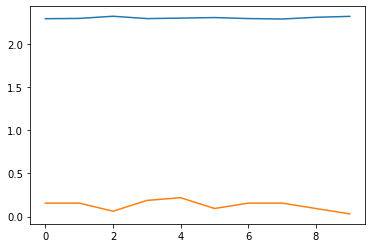

In [100]:
BATCH_SIZE = 32
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
losses, accuracies = [], []
for i in (t := trange(10)):
    samp = np.random.randint(0, X_train.shape[0], size = (BATCH_SIZE))
    X = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    out = model(X)
    acc = torch.argmax(out, dim=1)
    accuracy = (acc==Y).float().mean()
    loss = loss_function(out, Y)
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss is %.2f and accuracy is %.2f" % (loss, accuracy))

    
plot(losses)
plot(accuracies)

In [92]:
l = np.random.randint(0,100, size=32)
X_train[[0, 1]]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)